In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [170]:
def CDA(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((1,d))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - np.sum(w@x.T))
        for k in range(d):
            ak = 2 * np.linalg.norm(x[:,k])**2
            ck = 0
            for i in range(n):
                summation = 0
                for j in range(d):
                    if j !=k:
                        summation += w[0,j] * x[i,j]
#                 print("summation = ", summation)
                ck += 2* x[i, k]*(y[i] - (b + summation)) 

            if(ck < -lam):
                w[0, k] = (ck+lam)/ak
            elif (ck>lam):
                w[0, k] = (ck-lam)/ak
            else:
                w[0, k] = 0
                
        return w
                
        #Check if converged
        if(np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            return w
        if(count > 100):
            print("count stopped it")
            return w
        count += 1
        
        w_prev = np.copy(w)
        
def CDA_better(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((d,))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - np.sum(w@x.T))
        
        for k in range(d):
            ak = 2 * np.linalg.norm(x[:,k])**2
            x_new = np.append(x[:,:k], x[:,k+1:], axis = 1)
            w_new = np.append(w[:k], w[k+1:])
#             print("summation ?= ", np.sum(w_new@x_new.T))
            ck = 2 * np.sum(x[:,k] @ (y - (b + w_new@x_new.T)))
            if(ck < -lam):
                w[k] = (ck+lam)/ak
            elif (ck>lam):
                w[k] = (ck-lam)/ak
            else:
                w[k] = 0
                
#         return w
                
        #Check if converged
        if(np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            return w
        if(count > 1000):
            print("count stopped it")
            return w
        count += 1
        
        w_prev = np.copy(w)

In [146]:
# x = range(10)
print(w.shape)
x_new = np.append(w[:k], w[k+1:])
x_new.shape

(10,)


(9,)

In [147]:
k = 0
b = np.mean(y - sum(w@x.T))
print("x[:,k] shape = ", x[:,k].shape)
print("y shape = ", y.shape)
print("b shape = ", b.shape)
print("w shape = ", w.shape)
print("x shape = ", x.shape)
print("sum(w@x.T) shape = ", sum(w@x.T).shape)
print("x[:,k] shape", x[k,:].shape)
print("sum(w*x[:,k] shape = ", sum(w*x[k,:]).shape)
2 * np.sum(x[:,k] * (y + b + sum(w@x.T) - sum(w*x[k,:])))

x[:,k] shape =  (50,)
y shape =  (50,)
b shape =  ()
w shape =  (10,)
x shape =  (50, 10)
sum(w@x.T) shape =  ()
x[:,k] shape (10,)
sum(w*x[:,k] shape =  ()


-22.410886522404553

In [148]:
def find_lam_max(x, y, d):
    lam_max_list = np.zeros(d)
    for k in range(d):
        summation = 0
        for i in range(n):
            summation += x[i,k] * (y[i] - np.mean(y))*2
        lam_max_list[k] = summation
    return np.max(lam_max_list)


In [172]:
n = 500
d = 1000
k = 100
sigma = 1
num_lams = 10
scale_fac = 1.5

#make w array
w = np.zeros(d)
for j in range(10):
    w[j] = j/10
    

x = np.random.normal(size=(n, d))
y = w @ x.T + np.random.normal(0, sigma, size=(n))

print("x shape", x.shape)
print("y shape", y.shape)

num_nonzero = np.zeros(num_lams)
lam_list = np.zeros(num_lams)


lam = find_lam_max(x, y, d)

# print("better = ", CDA_better(np.copy(x), np.copy(y), lam/10))
# print("not better = ", CDA(np.copy(x), np.copy(y), lam/10))
for i in range(num_lams):
    print(i)
    w = CDA_better(x, y, lam)
    num_nonzero[i] = np.count_nonzero(w)
    print("num terms = ",num_nonzero[i])
    lam_list[i] = lam
    lam = lam/scale_fac

# print(CDA(x, y, lam_max))

x shape (500, 1000)
y shape (500,)
0


C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in matmul


num terms =  0.0
1
count stopped it
num terms =  1000.0
2


KeyboardInterrupt: 

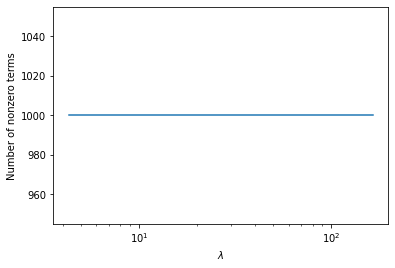

In [169]:
plt.plot(lam_list, num_nonzero)
plt.xlabel(r'$\lambda$')
plt.ylabel('Number of nonzero terms')
plt.xscale('log')

In [1]:
# print(w.shape)
# print(x.shape)
# print(x)
# print(w.T@x)
# b = np.mean(y - np.sum(w.T@x))
# print(b)

print(y.shape)
print(b.shape)
print(sum(w.T@x).shape)
print(sum(np.multiply(w.T, np.diagonal(x))).shape)
print(np.sum(np.multiply(w.T, np.diagonal(x))))


NameError: name 'y' is not defined

In [2]:
np.multiply(w.T, np.diagonal(x))
# np.diagonal(x)
# w

NameError: name 'np' is not defined